In [1]:
import pandas as pd
import os
from utils import merge_eval_csv
import matplotlib.pyplot as plt

### Preprocessing, not needed later (skip)

In [2]:
path_to_files = 'ignore/fl_baseline_0107/'
local1_file = '2_train_results.csv'
local2_file = 'client_results/1_train_results.csv'

In [4]:
local_1 = pd.read_csv(path_to_files + local1_file, index_col=0)
local_1['round'] = local_1['round'] + 3
local_2 = pd.read_csv(path_to_files + local2_file, index_col=0)

In [5]:
local = pd.concat([local_1, local_2], axis=0)

In [6]:
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,8,1,1,498.524517,0.190568,0.227673,0.853977
1,8,1,2,497.483815,0.171336,0.237999,0.840064
2,10,0,1,512.496586,0.168371,0.236562,0.840443
3,10,0,2,517.137554,0.139767,0.260589,0.849422
4,4,3,1,710.776620,0.206731,0.218576,0.874514


In [7]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,791.650002,0.265035,0.220310,0.850477
1,0,0,2,775.985800,0.241944,0.219961,0.859968
2,0,1,1,752.058415,0.238384,0.233105,0.843336
3,0,1,2,755.276150,0.229891,0.224502,0.845023
4,0,2,1,776.122987,0.227524,0.254269,0.848643


In [8]:
local.to_csv(path_to_files+'train_results.csv')

In [ ]:
# merge_eval_csv(path_to_files+'client_results/', out_file='1_train_results.csv')

In [73]:
global_1 = pd.read_csv(path_to_files + 'global_validation_fl_baseline.csv')
global_2 = pd.read_csv(path_to_files + 'global_validation_fl_baseline_1.csv')

In [74]:
global_2['round'] = global_2['round'] + 3

In [75]:
global_df = pd.concat([global_1, global_2], axis=0)

In [ ]:
global_df.sort_values(by=['round'], inplace=True)
global_df.reset_index(inplace=True, drop=True)
global_df

In [77]:
global_df.to_csv(path_to_files+'global_validation_fl_baseline_new.csv')

### Start from here

# 01 07

## Local Results

In [4]:
path_to_files = 'ignore/fl_baseline_0107/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [5]:
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,791.650002,0.265035,0.220310,0.850477
1,0,0,2,775.985800,0.241944,0.219961,0.859968
2,0,1,1,752.058415,0.238384,0.233105,0.843336
3,0,1,2,755.276150,0.229891,0.224502,0.845023
4,0,2,1,776.122987,0.227524,0.254269,0.848643


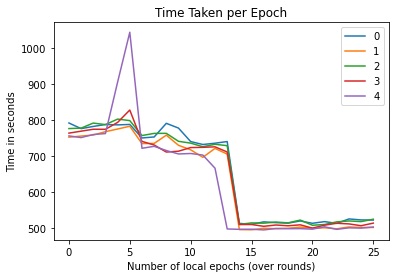

In [43]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

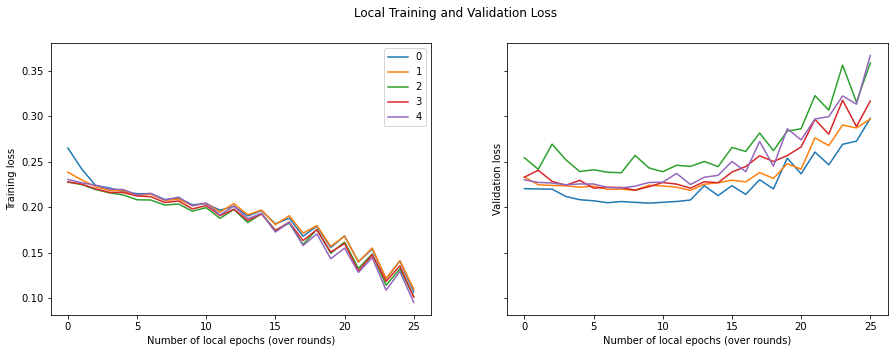

In [47]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

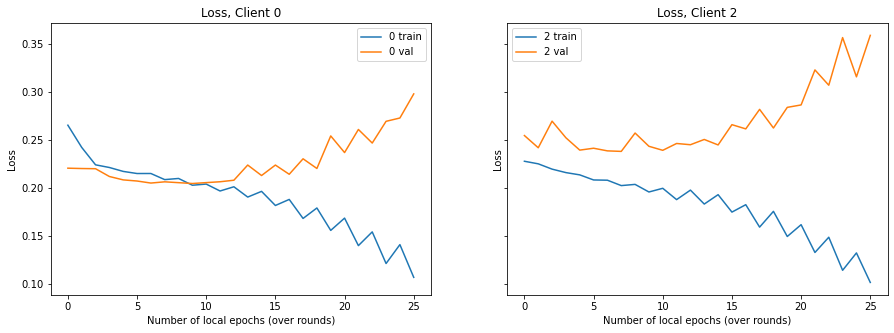

In [50]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [2]:
    client_df = local[local['client']==i].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 2')


plt.show()

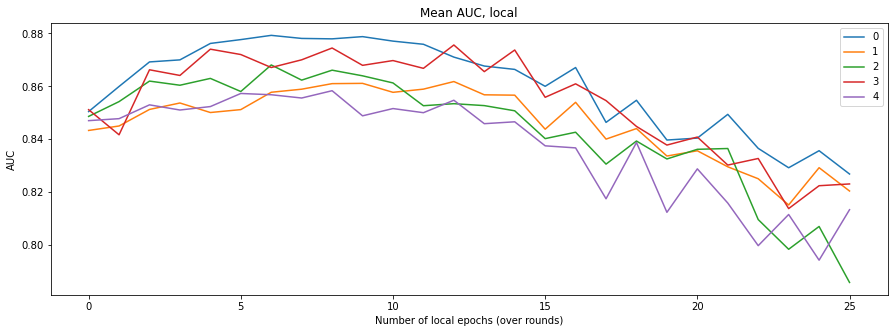

In [51]:
fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

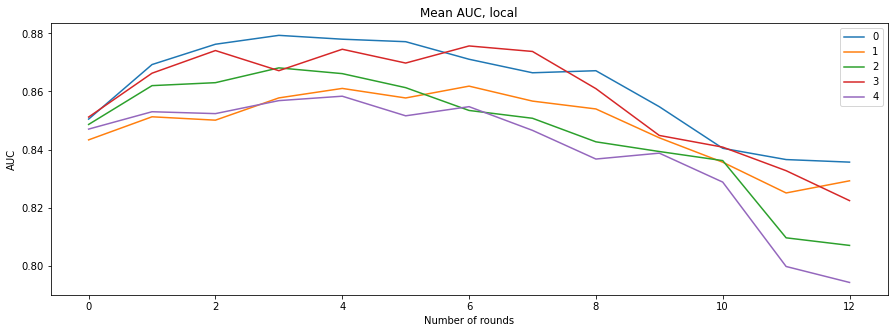

In [52]:
# only looking at first epoch per round

fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==i]
    client_df = client_df[client_df['epoch'] == 1].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [80]:
global_df = pd.read_csv(path_to_files+'global_validation_fl_baseline.csv', index_col=0)

In [81]:
global_df

,round,val AUC
0,0,0.856399
1,1,0.860370
2,2,0.863935
3,3,0.865377
4,4,0.856533
5,5,0.856412
6,6,0.853055
7,7,0.845170
8,8,0.826137
9,9,0.823760


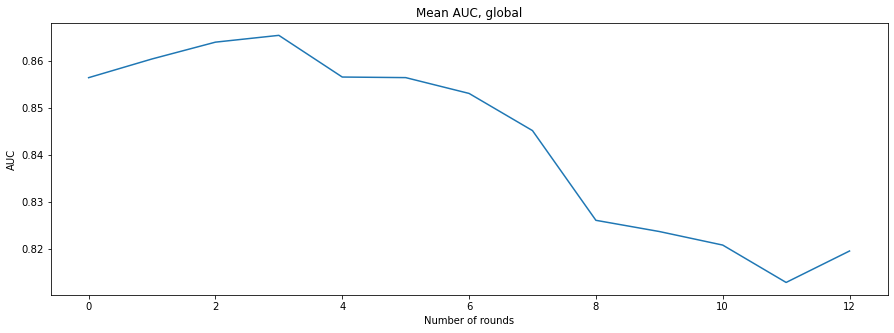

In [83]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df['round'], global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()

# 06 07

## Local Results

In [2]:
path_to_files = 'ignore/fl_baseline_0607/'
local_file='train_results.csv'
local = pd.read_csv(path_to_files + local_file, index_col=0)

In [4]:
local.sort_values(by=['round', 'client', 'epoch'], inplace=True)
local.reset_index(inplace=True, drop=True)
local.head()

,round,client,epoch,time,train loss,val loss,val AUC
0,0,0,1,572.455252,0.250485,0.215091,0.858190
1,0,1,1,568.498893,0.237763,0.249205,0.840049
2,0,2,1,565.167770,0.233761,0.244564,0.848264
3,0,3,1,555.698414,0.232546,0.239412,0.861010
4,0,4,1,531.082065,0.234133,0.227578,0.845245


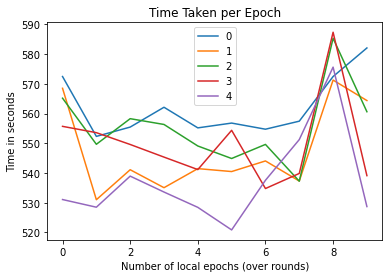

In [14]:
fig = plt.figure()

for i in range(5):
    client_df = local[local['client']==str(i)].reset_index(drop=True)
    plt.plot(client_df.index, client_df['time'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('Time in seconds')
plt.title('Time Taken per Epoch')

plt.show()

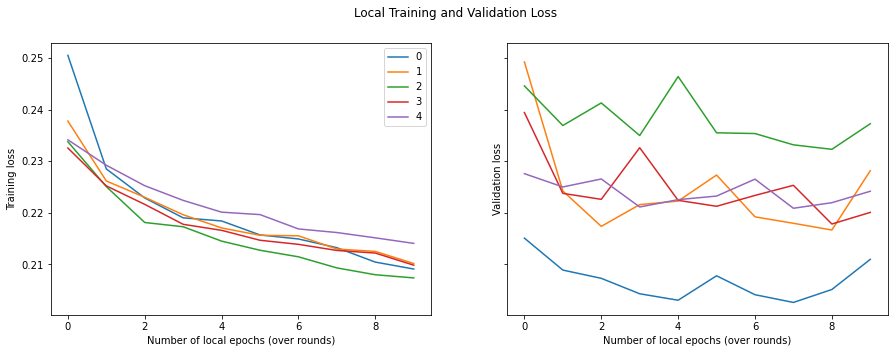

In [16]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==str(i)].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=client_df['client'][0])

ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Training loss')


for i in range(5):
    client_df = local[local['client']==str(i)].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['val loss'], label=client_df['client'][0])

ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Validation loss')

fig.suptitle('Local Training and Validation Loss')


plt.show()

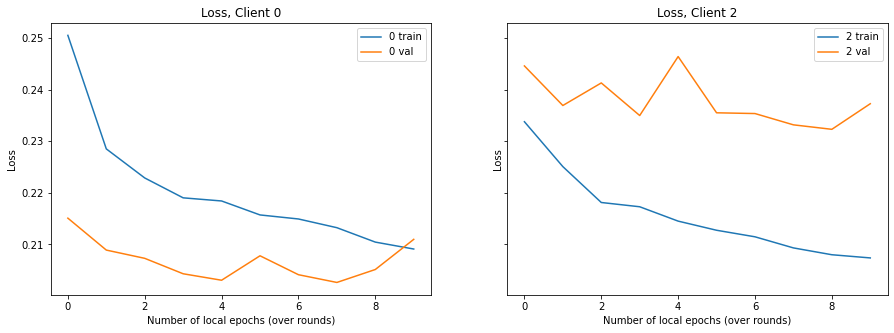

In [17]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))

for i in [0]:
    client_df = local[local['client']==str(i)].reset_index(drop=True)
    ax[0].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[0].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')


ax[0].legend()
ax[0].set_xlabel('Number of local epochs (over rounds)')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss, Client 0')

for i in [2]:
    client_df = local[local['client']==str(i)].reset_index(drop=True)
    ax[1].plot(client_df.index, client_df['train loss'], label=str(client_df['client'][0]) + ' train')
    ax[1].plot(client_df.index, client_df['val loss'], label=str(client_df['client'][0])+ ' val')

ax[1].legend()
ax[1].set_xlabel('Number of local epochs (over rounds)')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss, Client 2')


plt.show()

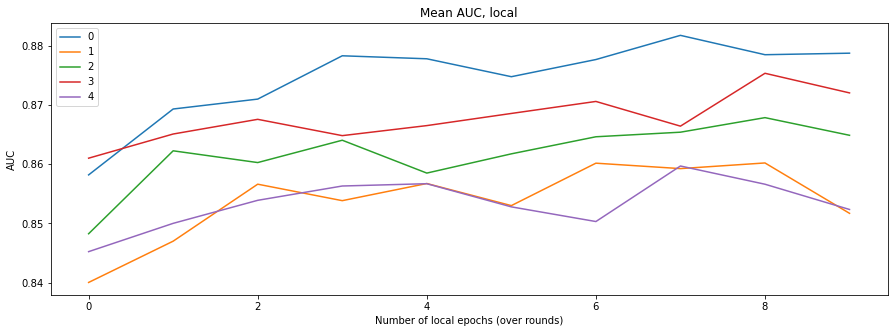

In [18]:
fig = plt.figure(figsize=(15,5))

for i in range(5):
    client_df = local[local['client']==str(i)].reset_index(drop=True)
    plt.plot(client_df.index, client_df['val AUC'], label=client_df['client'][0])

plt.legend()
plt.xlabel('Number of local epochs (over rounds)')
plt.ylabel('AUC')
plt.title('Mean AUC, local')

plt.show()

## Global Results

In [19]:
global_df = pd.read_csv(path_to_files+'global_validation.csv', index_col=0)

In [20]:
global_df

,val AUC
round,
0,0.851778
1,0.858471
2,0.862369
3,0.864094
4,0.864599
5,0.864693
6,0.864126
7,0.866014
8,0.867274


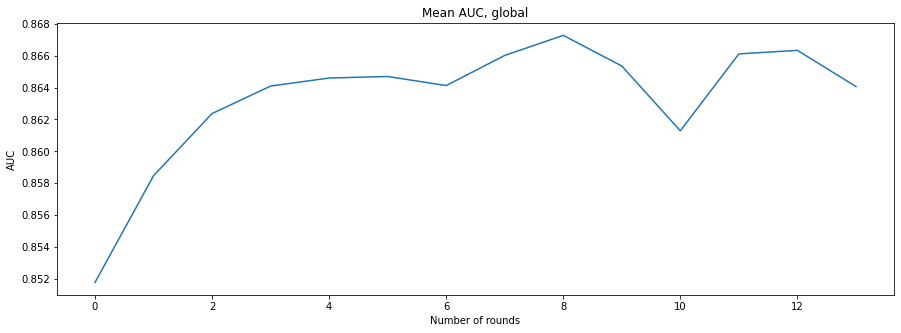

In [22]:
fig = plt.figure(figsize=(15,5))


plt.plot(global_df.index, global_df['val AUC'])

plt.xlabel('Number of rounds')
plt.ylabel('AUC')
plt.title('Mean AUC, global')

plt.show()